In [1]:
import pandas as pd

In [66]:
titanic_data = pd.read_csv('train.csv')

In [67]:
titanic_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [61]:
f = (titanic_data['Parch'] == 1) & titanic_data['Pclass'] == 3
f.sum()

0

titanic_data['Age'].isna().sum()

In [16]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
titanic_data['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [68]:
import math
def preprocess(data):
    data.pop('PassengerId')
    data.pop('Cabin')
    data.pop('Ticket')
    data.pop('Name')
    data.pop('Embarked')
    data['Sex'] = pd.Categorical(data['Sex'])
    data['Sex'] = data['Sex'].cat.codes
    data.dropna(inplace=True)
#     data['Age'].fillna(data['Age'].median(), inplace=True)
#     data['Age'] = data['Age'].mean()
    return data
    

array([[<AxesSubplot:title={'center':'Survived'}>,
        <AxesSubplot:title={'center':'Pclass'}>,
        <AxesSubplot:title={'center':'Sex'}>],
       [<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'SibSp'}>,
        <AxesSubplot:title={'center':'Parch'}>],
       [<AxesSubplot:title={'center':'Fare'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

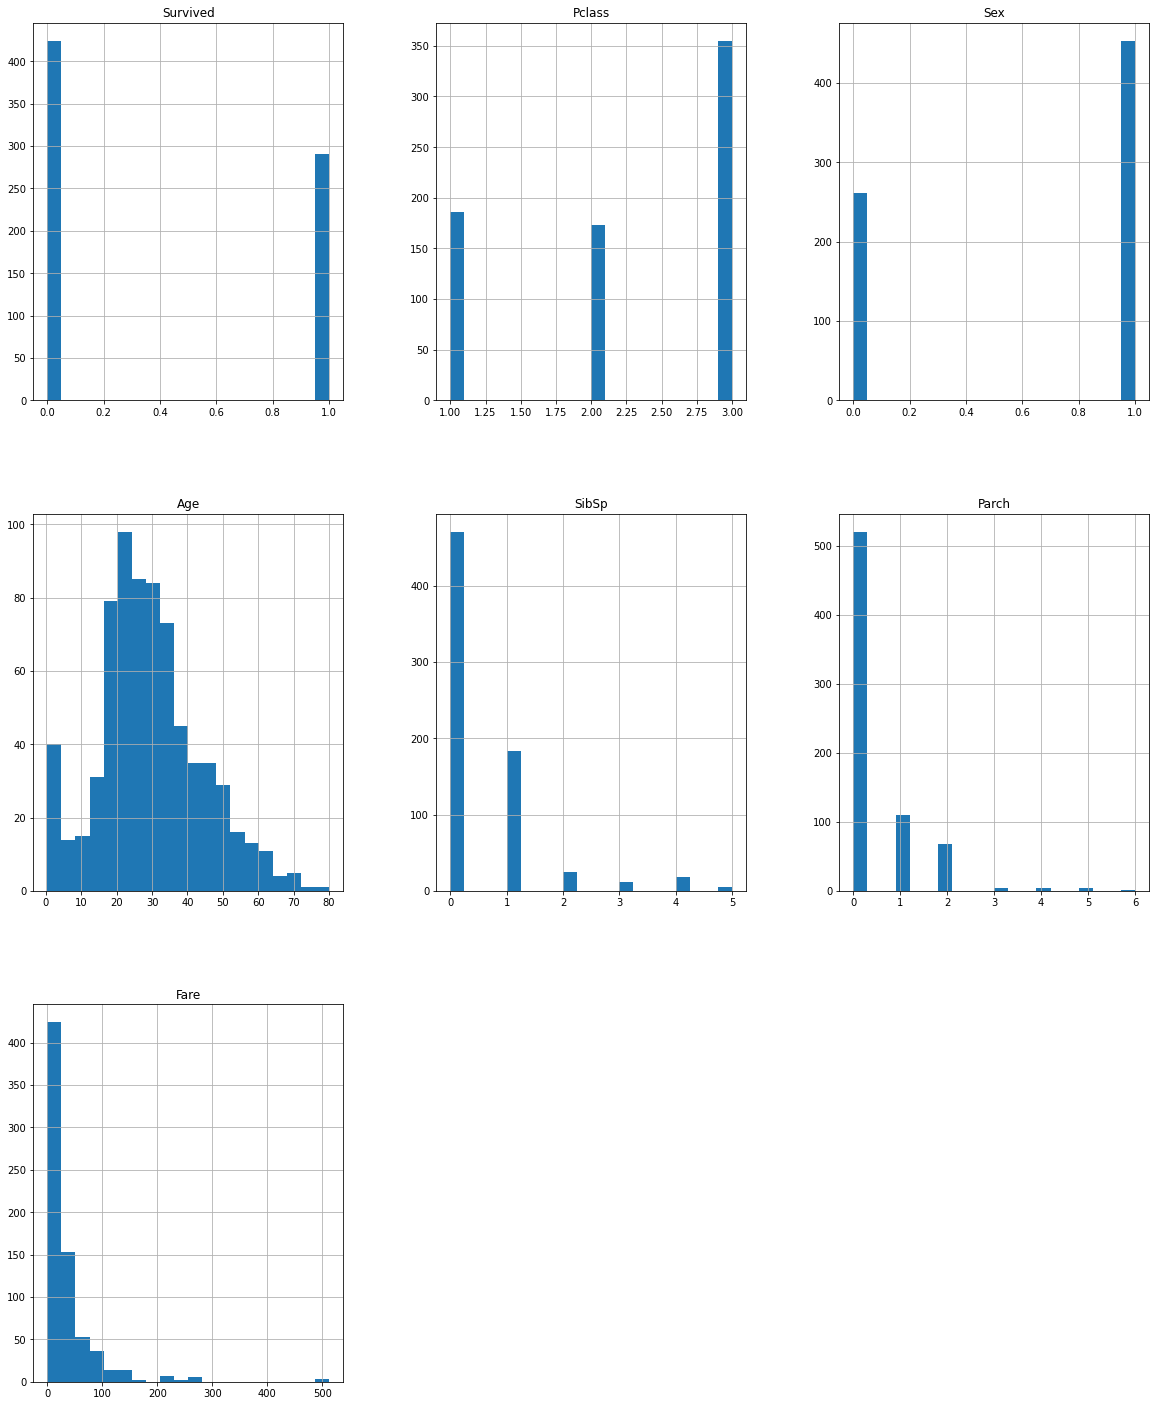

In [69]:
titanic_data = preprocess(titanic_data)
titanic_data.hist(bins=20, figsize=(20, 25))

In [70]:
titanic_survived = titanic_data.pop('Survived')

In [71]:
corr = {}
for name, column in titanic_data.items():
    corr[name] = titanic_data[name].corr(titanic_survived)

In [72]:
corr

{'Pclass': -0.359652682086846,
 'Sex': -0.5388255930146365,
 'Age': -0.07722109457217768,
 'SibSp': -0.01735836047953421,
 'Parch': 0.09331700774224293,
 'Fare': 0.2681886168744788}

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


In [73]:
from sklearn.model_selection import train_test_split

In [75]:
X_train, X_val, y_train, y_val = train_test_split(titanic_data, titanic_survived, test_size=0.1, random_state=52)


In [76]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [77]:
model.score(X_val, y_val)

0.7916666666666666

In [80]:
from sklearn.linear_model import RidgeClassifier
model = RidgeClassifier(alpha=0.4)
model.fit(X_train, y_train)
model.score(X_val, y_val)

0.8055555555555556

In [85]:
from sklearn.svm import SVC
model = SVC(C=2.0)
model.fit(X_train, y_train)
model.score(X_val, y_val)

0.75